     tiempo_s  p1_bar  p2_bar  velc_m/s    F_m3/s    F_m3/h
225     450.0     2.0     1.0  1.314230  0.000666  2.397348
300     600.0     3.0     1.1  2.185223  0.001107  3.986168
500    1000.0     3.0     1.5  1.849468  0.000937  3.373702


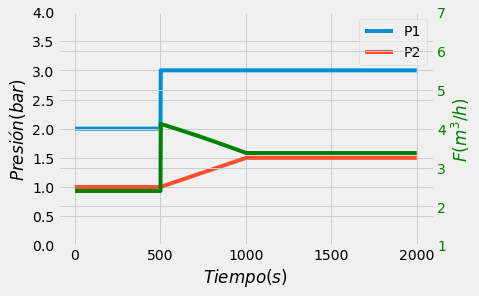

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import pandas as pd
from scipy.optimize import newton
#from IPython.display impor display
from SPQentrada import *

#Datos iniciales
p1 = 2
p2 = 1
d_in = 1 
L = 50
dt = 2
fd = 0.03
rho = 1000  #kg/m3

z = 5

#Datos Escalon P1
t0_e1= 500
A_e1 = 1

#Datos Escalon P2
t0_e2= 500
A_e2 = 0

#Datos Rampa P1
t0_r1 = 500
pend1 = 0
dt1 = 500

#Datos Rampa P2
t0_r2 = 500
pend2 = 0.001
dt2 = 500

#Datos ExpDecreciente P1
t0_exd1 = 500
tau1 = 100
A_exd1 = 0

#Datos ExpDecreciente P2
t0_exd2 = 500
tau2 = 100
A_exd2 = 0

#límites "y". Cambio de escala
escalapresion = (0,4)
escalaF = (1,7)



def ejercicio11():
    
    #conversión automática de datos
    d_m = d_in * 0.0254
    area = np.pi * d_m**2 / 4
    
    T = []
    P1 = []
    P2 = []
    V = []
    F = []

    for i in range(0,1001,1):
        t = i * dt
        T = np.append(T, t)
        p1t = p1 \
        + ESCALON(t0_e1, A_e1, t)\
        + RAMPA(t0_r1, pend1, dt1, t)\
        + ExpDecr(t0_exd1, tau1, A_exd1, t)
        P1 = np.append(P1, p1t)
    
        p2t = p2 \
        + ESCALON(t0_e2, A_e2, t)\
        + RAMPA(t0_r2, pend2, dt2, t)\
        + ExpDecr(t0_exd2, tau2, A_exd2, t)
        P2 = np.append(P2, p2t)
    
        p1_pascal = p1t * 100000
        p2_pascal = p2t * 100000
        
        #En lugar de despejar v, resuelvo para F0=0
        def FOsolv (v):
            
            F0 = (p1_pascal - p2_pascal) / (rho * 9.8) \
            - fd * L/d_m * v**2 / (2 * 9.8)\
            - z
            return F0
        
        sol = newton(FOsolv, 1.5)
        v = sol
    
        V = np.append(V, v)
    
        f = v * area
        F = np. append(F, f)

    F_m3h= F * 3600

    #creacion de tabla df para pandas:
    valores = {'tiempo_s':T,
               'p1_bar':P1, 'p2_bar':P2,
               'velc_m/s':V,
               'F_m3/s':F, 'F_m3/h':F_m3h}
    columnas = ['tiempo_s', 'p1_bar', 'p2_bar', 'velc_m/s', 'F_m3/s', 'F_m3/h']
    df = pd.DataFrame(valores, columns=columnas)

    #gráficos
    fig, ax1 = plt.subplots()

    ax1.plot(T, P1, label="P1")
    ax1.plot(T, P2, label="P2")
    ax1.set_xlabel('$Tiempo (s)$')
    ax1.set_ylabel('$Presión (bar)$')

    ax2 = ax1.twinx()
    ax2.plot(T, F_m3h, 'g-')
    ax2.set_ylabel('$F (m^3/h)$', color='g')
    ax2.tick_params('y', colors='g')

    #limites en y (Corrección de escala)
    ax1.set_ylim(escalapresion)
    ax2.set_ylim(escalaF)
    ax1.legend()

    tabla = df[(df.tiempo_s == 450) | (df.tiempo_s == 600) | (df.tiempo_s == 1000)]
    print (tabla)
    
ejercicio11()

Buscar un valor específico

     tiempo_s  p1_bar  p2_bar  velc_m/s    F_m3/s    F_m3/h
225     450.0     2.0     1.0   1.31423  0.000666  2.397348
300     600.0     3.0     2.0   1.31423  0.000666  2.397348
500    1000.0     7.0     6.0   1.31423  0.000666  2.397348


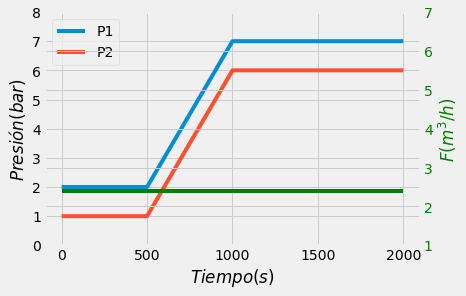

In [2]:
#Datos iniciales
p1 = 2
p2 = 1
d_in = 1 
L = 50
dt = 2
fd = 0.03
rho = 1000  #kg/m3

z = 5


#Datos Escalon P1
t0_e1= 500
A_e1 = 0

#Datos Escalon P2
t0_e2= 500
A_e2 = 0

#Datos Rampa P1
t0_r1 = 500
pend1 = 5/500
dt1 = 500

#Datos Rampa P2
t0_r2 = 500
pend2 = 5/500
dt2 = 500

#Datos ExpDecreciente P1
t0_exd1 = 500
tau1 = 100
A_exd1 = 0

#Datos ExpDecreciente P2
t0_exd2 = 500
tau2 = 100
A_exd2 = 0

#límites "y". Cambio de escala
escalapresion = (0,8)
escalaF = (1,7)

ejercicio11()

     tiempo_s  p1_bar  p2_bar  velc_m/s    F_m3/s    F_m3/h
225     450.0     2.0     1.0  1.314230  0.000666  2.397348
300     600.0     3.0     1.2  2.106308  0.001067  3.842215
500    1000.0     7.0     2.0  3.908179  0.001980  7.129094


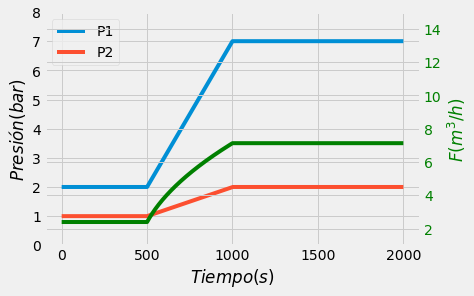

In [3]:
#Datos iniciales
p1 = 2
p2 = 1
d_in = 1 
L = 50
dt = 2
fd = 0.03
rho = 1000  #kg/m3

z = 5


#Datos Escalon P1
t0_e1= 500
A_e1 = 0

#Datos Escalon P2
t0_e2= 500
A_e2 = 0

#Datos Rampa P1
t0_r1 = 500
pend1 = 5/500
dt1 = 500

#Datos Rampa P2
t0_r2 = 500
pend2 = 1/500
dt2 = 500

#Datos ExpDecreciente P1
t0_exd1 = 500
tau1 = 100
A_exd1 = 0

#Datos ExpDecreciente P2
t0_exd2 = 500
tau2 = 100
A_exd2 = 0

#límites "y". Cambio de escala
escalapresion = (0,8)
escalaF = (1,15)

ejercicio11()

     tiempo_s  p1_bar    p2_bar  velc_m/s    F_m3/s    F_m3/h
225     450.0     2.0  1.000000  1.314230  0.000666  2.397348
300     600.0     2.0  1.316060  0.810438  0.000411  1.478357
500    1000.0     2.0  1.496631  0.212782  0.000108  0.388146


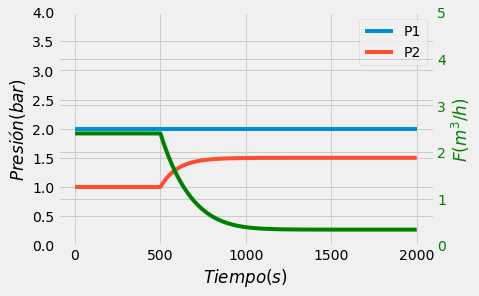

In [14]:
""" la exponencial A_exp2=1 no converge, se modifica a A_exp2= 0.5"""

#Datos iniciales
p1 = 2
p2 = 1
d_in = 1 
L = 50
dt = 2
fd = 0.03
rho = 1000  #kg/m3

z = 5

#Datos Escalon P1
t0_e1= 500
A_e1 = 0

#Datos Escalon P2
t0_e2= 500
A_e2 = 0

#Datos Rampa P1
t0_r1 = 500
pend1 = 0
dt1 = 500

#Datos Rampa P2
t0_r2 = 500
pend2 = 0
dt2 = 500

#Datos ExpDecreciente P1
t0_exd1 = 500
tau1 = 100
A_exd1 = 0

#Datos ExpDecreciente P2
t0_exd2 = 500
tau2 = 100
A_exd2 = 0.5

#límites "y". Cambio de escala
escalapresion = (0,4)
escalaF = (0,5)

ejercicio11()

     tiempo_s  p1_bar  p2_bar  velc_m/s    F_m3/s    F_m3/h
225     450.0     2.0     1.0  1.314230  0.000666  2.397348
300     600.0     3.0     1.0  2.261386  0.001146  4.125100
500    1000.0     7.0     4.0  2.915567  0.001477  5.318423


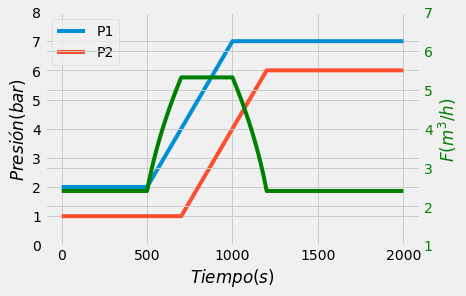

In [15]:
#Datos iniciales
p1 = 2
p2 = 1
d_in = 1 
L = 50
dt = 2
fd = 0.03
rho = 1000  #kg/m3

z = 5

#Datos Escalon P1
t0_e1= 500
A_e1 = 0

#Datos Escalon P2
t0_e2= 500
A_e2 = 0

#Datos Rampa P1
t0_r1 = 500
pend1 = 5/500
dt1 = 500

#Datos Rampa P2
t0_r2 = 700
pend2 = 5/500
dt2 = 500

#Datos ExpDecreciente P1
t0_exd1 = 500
tau1 = 100
A_exd1 = 0

#Datos ExpDecreciente P2
t0_exd2 = 500
tau2 = 100
A_exd2 = 0

#límites "y". Cambio de escala
escalapresion = (0,8)
escalaF = (1,7)

ejercicio11()

     tiempo_s  p1_bar  p2_bar  velc_m/s    F_m3/s    F_m3/h
225     450.0     2.0     1.0  1.314230  0.000666  2.397348
300     600.0     3.0     1.1  2.185223  0.001107  3.986168
500    1000.0     2.6     1.5  1.437312  0.000728  2.621869


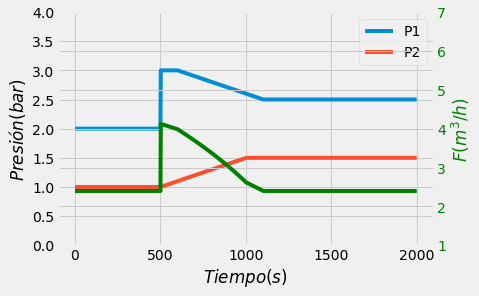

In [16]:
#Datos iniciales
p1 = 2
p2 = 1
d_in = 1 
L = 50
dt = 2
fd = 0.03
rho = 1000  #kg/m3

z = 5

#Datos Escalon P1
t0_e1= 500
A_e1 = 1

#Datos Escalon P2
t0_e2= 500
A_e2 = 0

#Datos Rampa P1
t0_r1 = 600
pend1 = -0.001
dt1 = 500

#Datos Rampa P2
t0_r2 = 500
pend2 = 0.001
dt2 = 500

#Datos ExpDecreciente P1
t0_exd1 = 500
tau1 = 100
A_exd1 = 0

#Datos ExpDecreciente P2
t0_exd2 = 500
tau2 = 100
A_exd2 = 0

#límites "y". Cambio de escala
escalapresion = (0,4)
escalaF = (1,7)

ejercicio11()